# Option pricing using Monte Carlo Simulations

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

i = 1000000             # no of different paths for simulation
S0 = 200                # current stock price
K = 180                 # strike
r = 0.02                # risk free interest rate
sigma = 0.15            # volatility
T = 1/12                # time to expiration
N = 240                 # time steps for a path
dt = T / N
discount_factor = np.exp(-r * T)

# Geometric Brownian motion path generating function
def gen_paths(S0, r, sigma, T, N, I):
    dt = float(T) / N
    paths = np.zeros((N + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, N + 1):
        rand = np.random.standard_normal(I)
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                                         sigma * np.sqrt(dt) * rand)
    return paths

# generate paths
np.random.seed(123)
paths = gen_paths(S0, r, sigma, T, N, i)

# paths[-1] gives the value of stock at expiration (St)
V = np.maximum(0, paths[-1] - K)

# The payoff will be the max of (St - K, 0)
CallPayoffAverage = np.average(np.maximum(0, paths[-1] - K))
CallPayoff = discount_factor * CallPayoffAverage

print("Call option price :",CallPayoff)


Call option price : 20.31684431668016


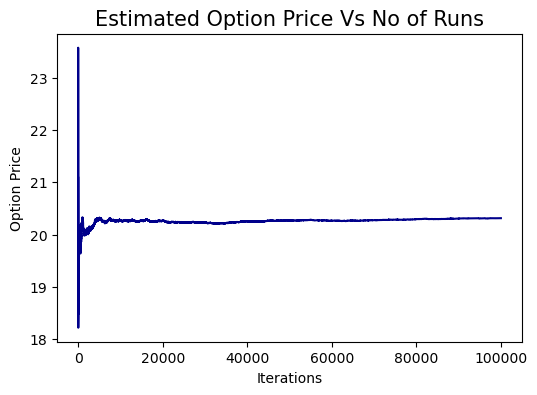

In [37]:
# plotting option price vs number of runs starting from 0 to 100000
I = 100000
sim = np.zeros(I)
for x in range(0,I):
    sim[x] = discount_factor*V[0:x+1].mean()
    
plt.figure(figsize=(6, 4))
plt.title('Estimated Option Price Vs No of Runs',fontsize=15)
plt.xlabel('Iterations')
plt.ylabel('Option Price')
plt.plot(sim,color='darkblue');


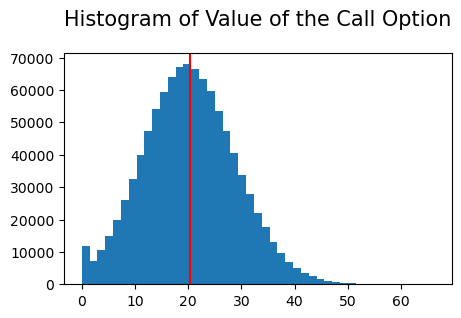

In [40]:
# Histogram of Value of call option depicting that the underlying asset prices have lognormal distribution

plt.figure(figsize=(5,3))
plt.hist(np.exp(-r * T) * V, bins=45)
plt.title('Histogram of Value of the Call Option',fontsize=15,pad = 20)
plt.axvline(np.exp(-r * T) * V.mean(), c='red')
plt.show()